In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv', 'coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv']


In [2]:
bc_history = pd.read_csv('../input/bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')
bc_history_nonan = bc_history.dropna(thresh=2)

In [3]:
bc_history

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bc_history_nonan.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


## Data Preprocessing

There are two possibilities for missing data in our dataset (as explained in the dataset description):
1. When at a given timestamp there is no trade or activity the field will be filled with NaN value
2. When there are some technical error (such as the API is down) then the timestamp is missing (the dataset are recorded on each minutes

### Selecting data

In here, we're going to select dataset with minimal missing timestamp jump

In [5]:
bc_history_nonan['Delta_Timestamp'] = bc_history_nonan['Timestamp'] - bc_history_nonan['Timestamp'].shift(1)
bc_history_nonan['Delta_Timestamp']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0              NaN
478        28680.0
547         4140.0
548           60.0
1224       40560.0
1896       40320.0
2333       26220.0
3612       76740.0
4553       56460.0
4710        9420.0
4742        1920.0
4780        2280.0
4878        5880.0
4882         240.0
4894         720.0
4895          60.0
5545       39000.0
5593        2880.0
6049       27360.0
6065         960.0
6227        9720.0
6241         840.0
6242          60.0
6248         360.0
6359        6660.0
6828       28140.0
6960        7920.0
7167       12420.0
7266        5940.0
7271         300.0
            ...   
3778779       60.0
3778780       60.0
3778781       60.0
3778782       60.0
3778783       60.0
3778786      180.0
3778787       60.0
3778788       60.0
3778789       60.0
3778790       60.0
3778791       60.0
3778792       60.0
3778793       60.0
3778794       60.0
3778795       60.0
3778796       60.0
3778797       60.0
3778799      120.0
3778800       60.0
3778801       60.0
3778802       60.0
3778804     

In [6]:
bc_history_nonan['Delta_Timestamp'].tail(5000)

3773153    180.0
3773154     60.0
3773155     60.0
3773156     60.0
3773157     60.0
3773158     60.0
3773159     60.0
3773160     60.0
3773163    180.0
3773164     60.0
3773165     60.0
3773170    300.0
3773172    120.0
3773173     60.0
3773174     60.0
3773175     60.0
3773176     60.0
3773177     60.0
3773178     60.0
3773179     60.0
3773180     60.0
3773181     60.0
3773182     60.0
3773183     60.0
3773184     60.0
3773185     60.0
3773186     60.0
3773187     60.0
3773188     60.0
3773189     60.0
           ...  
3778779     60.0
3778780     60.0
3778781     60.0
3778782     60.0
3778783     60.0
3778786    180.0
3778787     60.0
3778788     60.0
3778789     60.0
3778790     60.0
3778791     60.0
3778792     60.0
3778793     60.0
3778794     60.0
3778795     60.0
3778796     60.0
3778797     60.0
3778799    120.0
3778800     60.0
3778801     60.0
3778802     60.0
3778804    120.0
3778806    120.0
3778807     60.0
3778809    120.0
3778810     60.0
3778811     60.0
3778814    180

From the data above, we know 5000 lastest data only missing some empty values (this including timestamp jump and NaN values), so we will use it for processing.

In [7]:
bc_history = bc_history.tail(5000)
bc_history.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3773817,1552135260,3902.62,3903.11,3902.62,3903.11,0.482676,1883.936114,3903.105223
3773818,1552135320,3903.11,3903.11,3903.11,3903.11,4.727675,18452.636311,3903.110000
3773819,1552135380,3903.11,3903.37,3903.11,3903.37,1.150000,4488.615500,3903.143913
3773820,1552135440,3903.11,3903.46,3901.65,3901.65,5.993798,23395.765313,3903.329266
3773821,1552135500,3901.65,3903.25,3899.54,3902.59,8.798698,34331.851306,3901.924206


### Missing values replacement

Replace NaN field with previous data for continuous timeseries data

In [8]:
bc_history['Open'].fillna(method='ffill', inplace=True)
bc_history['High'].fillna(method='ffill', inplace=True)
bc_history['Low'].fillna(method='ffill', inplace=True)
bc_history['Close'].fillna(method='ffill', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Replace NaN field with zeros for single event data

In [9]:
bc_history['Volume_(BTC)'].fillna(value=0, inplace=True)
bc_history['Volume_(Currency)'].fillna(value=0, inplace=True)
bc_history['Weighted_Price'].fillna(value=0, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
bc_history.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3773817,1552135260,3902.62,3903.11,3902.62,3903.11,0.482676,1883.936114,3903.105223
3773818,1552135320,3903.11,3903.11,3903.11,3903.11,4.727675,18452.636311,3903.110000
3773819,1552135380,3903.11,3903.37,3903.11,3903.37,1.150000,4488.615500,3903.143913
3773820,1552135440,3903.11,3903.46,3901.65,3901.65,5.993798,23395.765313,3903.329266
3773821,1552135500,3901.65,3903.25,3899.54,3902.59,8.798698,34331.851306,3901.924206


In [11]:
bc_history.drop('Timestamp', axis=1, inplace=True)
bc_history

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3773817,3902.62,3903.11,3902.62,3903.11,0.482676,1883.936114,3903.105223
3773818,3903.11,3903.11,3903.11,3903.11,4.727675,18452.636311,3903.110000
3773819,3903.11,3903.37,3903.11,3903.37,1.150000,4488.615500,3903.143913
3773820,3903.11,3903.46,3901.65,3901.65,5.993798,23395.765313,3903.329266
3773821,3901.65,3903.25,3899.54,3902.59,8.798698,34331.851306,3901.924206
3773822,3903.66,3904.25,3901.95,3901.95,6.632888,25894.758089,3903.994549
3773823,3901.88,3901.88,3901.88,3901.88,0.850519,3318.623076,3901.880000
3773824,3901.88,3901.88,3901.88,3901.88,0.000000,0.000000,0.000000
3773825,3900.61,3900.70,3900.61,3900.70,0.240767,939.154696,3900.678811
3773826,3901.34,3901.34,3900.70,3900.70,4.925238,19211.923637,3900.709691


In [12]:
from scipy import stats

def rem_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    r = q3 - q1 #range between q1 and q3
    low = q1 - 1.5 * r
    hi = q3 + 1.5 * r
    out = df.loc[(df[col] > low) & (df[col] < hi)]
    return out

for feature in list(bc_history):
    bc_history = rem_outlier(bc_history,feature)

bc_history = bc_history[(np.abs(stats.zscore(bc_history)) < 2.9999999).all(axis=1)]
bc_history = bc_history[(np.abs(stats.zscore(bc_history)) > -2.999999).all(axis=1)]
bc_history

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3773817,3902.62,3903.11,3902.62,3903.11,0.482676,1883.936114,3903.105223
3773818,3903.11,3903.11,3903.11,3903.11,4.727675,18452.636311,3903.110000
3773819,3903.11,3903.37,3903.11,3903.37,1.150000,4488.615500,3903.143913
3773823,3901.88,3901.88,3901.88,3901.88,0.850519,3318.623076,3901.880000
3773825,3900.61,3900.70,3900.61,3900.70,0.240767,939.154696,3900.678811
3773826,3901.34,3901.34,3900.70,3900.70,4.925238,19211.923637,3900.709691
3773827,3900.70,3900.70,3900.70,3900.70,0.006000,23.404200,3900.700000
3773828,3900.70,3900.70,3900.70,3900.70,0.002837,11.066286,3900.700000
3773829,3899.49,3900.67,3899.49,3900.67,0.754000,2940.660320,3900.080000
3773830,3900.67,3901.07,3900.67,3900.67,2.196003,8566.513231,3900.957744


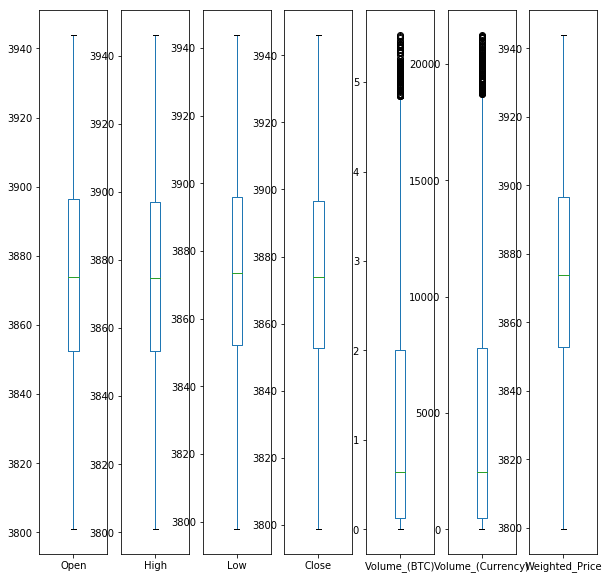

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


bc_history.plot(kind='box', subplots=True,  
             sharex=False, sharey=False, figsize=(10,10))
plt.show()

In [14]:
bc_history.corr(method='pearson').style\
.format("{:.2}").background_gradient\
(cmap=plt.get_cmap('coolwarm'), axis=1)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.0,1.0,1.0,1.0,-0.069,-0.062,1.0
High,1.0,1.0,1.0,1.0,-0.061,-0.055,1.0
Low,1.0,1.0,1.0,1.0,-0.077,-0.07,1.0
Close,1.0,1.0,1.0,1.0,-0.069,-0.063,1.0
Volume_(BTC),-0.069,-0.061,-0.077,-0.069,1.0,1.0,-0.069
Volume_(Currency),-0.062,-0.055,-0.07,-0.063,1.0,1.0,-0.063
Weighted_Price,1.0,1.0,1.0,1.0,-0.069,-0.063,1.0


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bc_history[[feature for feature in list(bc_history) if feature != 'Weighted_Price']] = scaler.fit_transform(bc_history[[feature for feature in list(bc_history) if feature != 'Weighted_Price']])
bc_history

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3773817,1.048130,1.047962,1.065658,1.065483,-0.539957,-0.537443,3903.105223
3773818,1.065491,1.047962,1.083004,1.065483,2.404920,2.433548,3903.110000
3773819,1.065491,1.057186,1.083004,1.074698,-0.077015,-0.070389,3903.143913
3773823,1.021911,1.004328,1.039463,1.021887,-0.284774,-0.280185,3901.880000
3773825,0.976914,0.962467,0.994506,0.980064,-0.707776,-0.706855,3900.678811
3773826,1.002778,0.985171,0.997691,0.980064,2.541975,2.569698,3900.709691
3773827,0.980103,0.962467,0.997691,0.980064,-0.870641,-0.871062,3900.700000
3773828,0.980103,0.962467,0.997691,0.980064,-0.872835,-0.873274,3900.700000
3773829,0.937231,0.961403,0.954858,0.979001,-0.351732,-0.347959,3900.080000
3773830,0.979040,0.975593,0.996629,0.979001,0.648627,0.660833,3900.957744


In [16]:
msk = np.random.rand(len(bc_history)) < 0.7
bc_history_train = bc_history[msk]
bc_history_test = bc_history[~msk]

y_train = bc_history_train['Weighted_Price']
X_train = bc_history_train[[feature for feature in list(bc_history) if feature != 'Weighted_Price']]

y_test = bc_history['Weighted_Price']
X_test = bc_history[[feature for feature in list(bc_history) if feature != 'Weighted_Price']]

In [17]:
from sklearn import metrics, decomposition

pca = decomposition.PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(2508, 6)
(3592, 6)


0.00946354866027832
0.9997579545098663


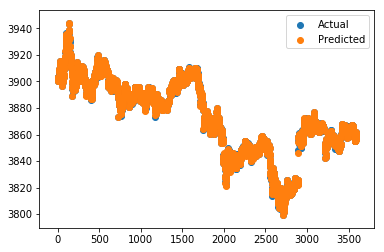

In [18]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time
%matplotlib inline

linear_regression = LinearRegression()
start = time.time()
linear_regression.fit(X_train,y_train)
end = time.time()
print(end - start)
predict = linear_regression.predict(X_test)
print(linear_regression.score(X_test,y_test))

y_len = range(len(y_test)) 
y_act = y_test 
plt.scatter(y_len,y_act) 
plt.scatter(y_len,predict) 
plt.gca().legend(('Actual','Predicted')) 
plt.show() 

In [19]:
from sklearn.model_selection import GridSearchCV


normalize = [False,True]
n_jobs = [0,1,5,10]
fit_intercept = [False,True]
copy_X = [False,True]
param_grid = dict(normalize=normalize,
                  fit_intercept=fit_intercept,n_jobs=n_jobs,copy_X=copy_X)
grid = GridSearchCV(estimator=linear_regression,
                    param_grid=param_grid,
                    cv=5)
grid_result = grid.fit(X_train, y_train)
grid_result.best_params_

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'copy_X': False, 'fit_intercept': True, 'n_jobs': 0, 'normalize': False}

0.0019466876983642578
0.9997579545098663


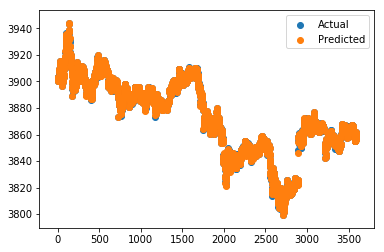

In [20]:
linear_regression = LinearRegression(fit_intercept=True, n_jobs=0, normalize=False, copy_X=False)
start = time.time()
linear_regression.fit(X_train,y_train)
end = time.time()
print(end - start)
predict = linear_regression.predict(X_test)
print(linear_regression.score(X_test,y_test))

y_len = range(len(y_test)) 
y_act = y_test 
plt.scatter(y_len,y_act) 
plt.scatter(y_len,predict) 
plt.gca().legend(('Actual','Predicted')) 
plt.show() 

### Recurrent Neural Network

In here, we use Recurrent Neural Network (RNN) using one Long Short Term Memory (LSTM) layer as its hidden layer. We convert the time unit from 60 seconds to be grouped each day. The prediction is for one month length

In [21]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [22]:
# Import the dataset and encode the date
df = pd.read_csv("../input/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [23]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [24]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [25]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1434/1434 [==============================] - 2s 1ms/step - loss: 0.0321
Epoch 2/100
1434/1434 [==============================] - 1s 400us/step - loss: 0.0274
Epoch 3/100
1434/1434 [==============================] - 1s 405us/step - loss: 0.0228
Epoch 4/100
1434/1434 [==============================] - 1s 399us/step - loss: 0.0181
Epoch 5/100
1434/1434 [==============================] - 1s 401us/step - loss: 0.0135
Epoch 6/100
1434/1434 [==============================] - 1s 393us/step - loss: 0.0091
Epoch 7/100
1434/1434 [==============================] - 1s 407us/step - loss: 0.0055
Epoch 8/100
1434/1434 [==============================] - 1s 399us/step - loss: 0.0028
Epoch 9/100
1434/1434 [==============================] - 1s 400us/step - loss: 0.0013
Epoch 10/100
1434/1434 [==============================] - 1s 398us/step - loss: 4.9937e-04
Epoch 11/100
1434

1434/1434 [==============================] - 1s 394us/step - loss: 1.4910e-04
Epoch 86/100
1434/1434 [==============================] - 1s 396us/step - loss: 1.4866e-04
Epoch 87/100
1434/1434 [==============================] - 1s 399us/step - loss: 1.5041e-04
Epoch 88/100
1434/1434 [==============================] - 1s 390us/step - loss: 1.4668e-04
Epoch 89/100
1434/1434 [==============================] - 1s 396us/step - loss: 1.5133e-04
Epoch 90/100
1434/1434 [==============================] - 1s 391us/step - loss: 1.4879e-04
Epoch 91/100
1434/1434 [==============================] - 1s 409us/step - loss: 1.4755e-04
Epoch 92/100
1434/1434 [==============================] - 1s 395us/step - loss: 1.4969e-04
Epoch 93/100
1434/1434 [==============================] - 1s 399us/step - loss: 1.4854e-04
Epoch 94/100
1434/1434 [==============================] - 1s 401us/step - loss: 1.4725e-04
Epoch 95/100
1434/1434 [==============================] - 1s 389us/step - loss: 1.5056e-04
Epoch 96/100

In [26]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

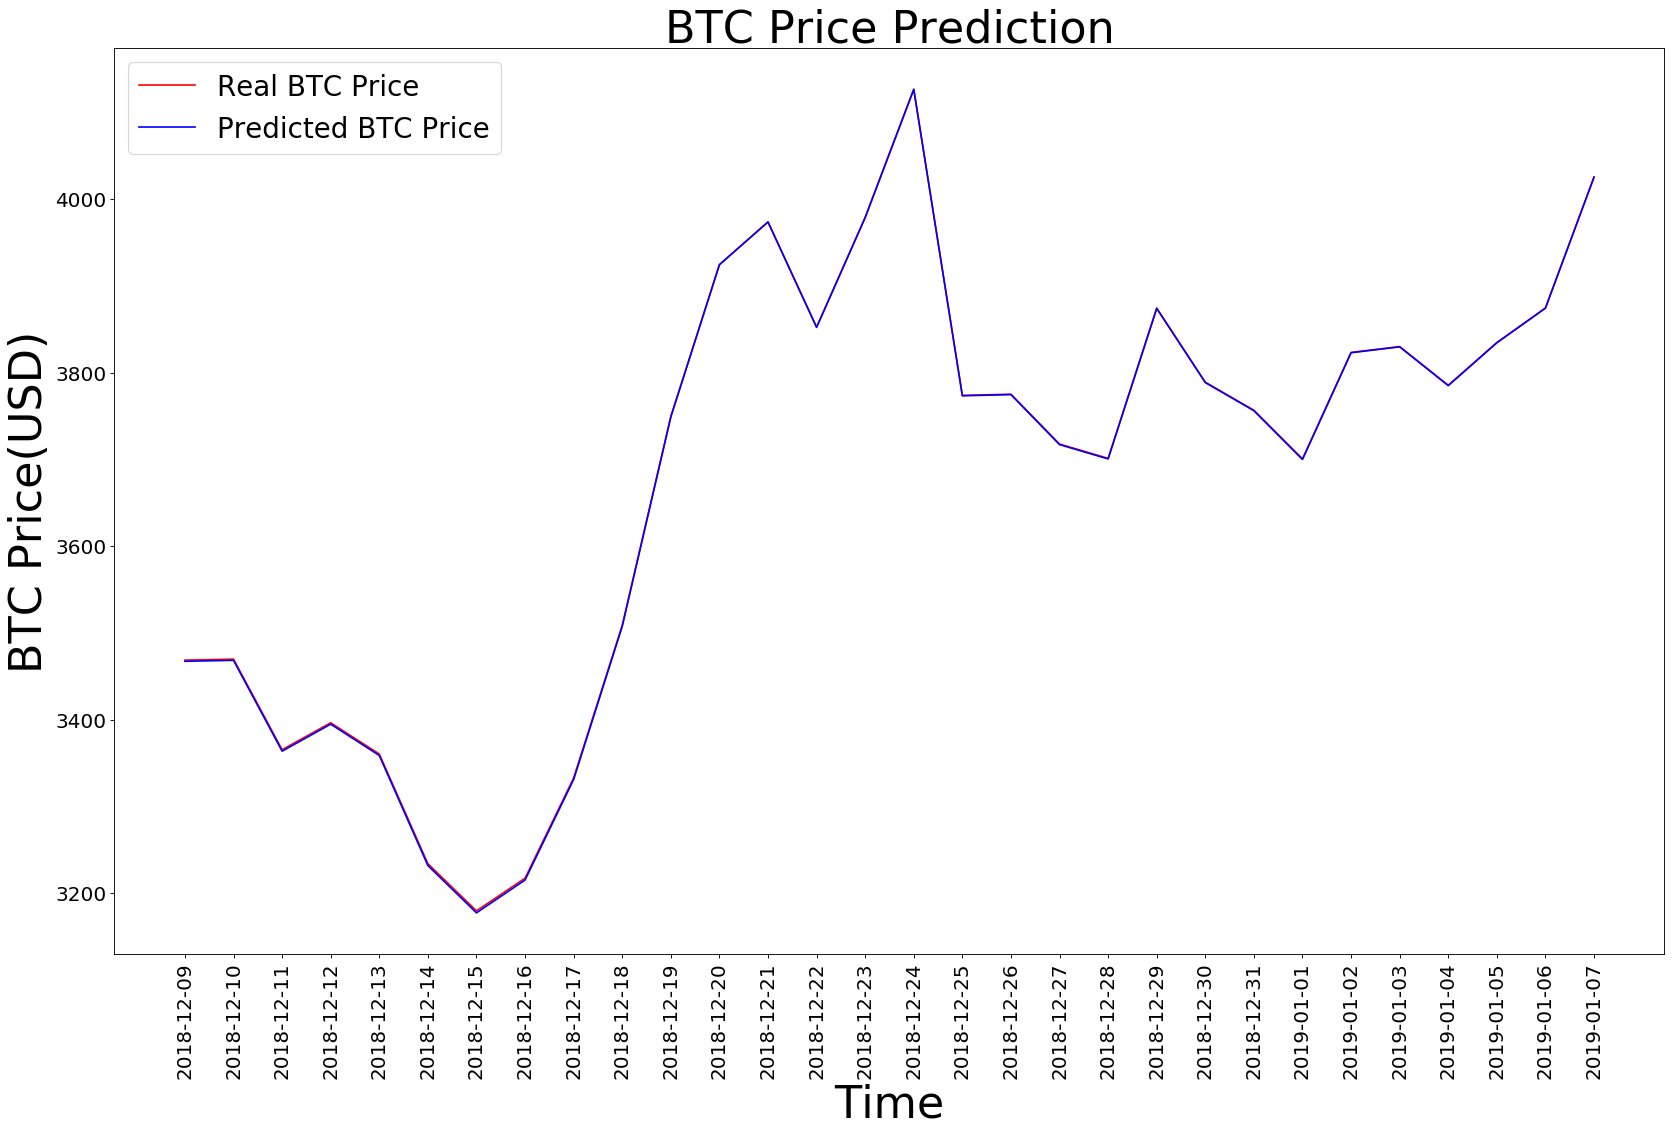

In [27]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test_reset = df_test.reset_index()
x=df_test_reset.index
labels = df_test_reset['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [28]:
# evaluate data
test_set = df_test.values
test_set = np.reshape(test_set, (len(test_set), 1))

sc = MinMaxScaler()
test_set = sc.fit_transform(test_set)
X_test = test_set[0:len(test_set)-1]
y_test = test_set[1:len(test_set)]
X_test = np.reshape(X_test, (len(X_test), 1, 1))

In [29]:
score = regressor.evaluate(X_test, y_test, verbose=1)
print("%s: %.2f%%" % (regressor.metrics_names[0], score*100))

29/29 [==============================] - 0s 3ms/step
loss: 1.66%
